# Vectorized logistic regression

Recognize the handwritten digits (from 0 to 9) by using vectorized regularized logistic regression.

In [2]:
import numpy as np
from scipy.io import loadmat
import scipy.optimize as opt
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import classification_report
%matplotlib inline 
np.set_printoptions(precision=3)

## 1 Load data

Training examples are stored in **ex3data1.mat**.

In [3]:
def load_data(path):
    data = loadmat(path)
    X, y = data['X'], data['y']
    y = y.reshape(y.shape[0])
    
    X = np.array([im.reshape((20, 20)).T for im in X])
    X = np.array([im.reshape(400) for im in X])
    
    return X, y

Transform y from labels to boolean vectors

In [19]:
def transform_y(y):
    y_matrix = []
    for i in range(1, 11):
        y_matrix.append((y==i).astype(int))
    return np.array([y_matrix[-1]] + y_matrix[:-1])


def get_label(y, index):
    label = y[:, index]
    return np.argmax(label)

In [27]:
X, y = load_data("ex3data1.mat")

X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)
print(X.shape)

raw_y = y.copy()
y = transform_y(y)
print(y)
print(y.shape)

(5000, 401)
[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 1]]
(10, 5000)


## 2 Visualizing the data

Plot the digit based on the X matrix.

In [21]:
def plot_digit(digit):
    fig, ax = plt.subplots(figsize=(1,1))
    ax.matshow(digit[1:].reshape((20, 20)), cmap=matplotlib.cm.binary)
    plt.xticks([])
    plt.yticks([])

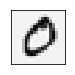

This should be 0


In [22]:
plot_digit(X[0])
plt.show()
print("This should be", get_label(y, 0))

## 3 Train 1-dimension model

First, try to check if a digit is zero.

In [10]:
def sigmoid(z):
    return 1 / (np.exp(-z) + 1)

In [11]:
def cost(theta, X, y):
    '''
    Compute the cost fuction of logistic regression.
    '''
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))

In [12]:
def regularized_cost(theta, X, y, reg=1):
    '''
    Compute the cost fuction of regularized logistic regression.
    Don't penalize theta_0.
    '''
    regularized_theta = theta[1:]
    regularized_term = (reg / (2 * len(X))) * np.power(regularized_theta, 2).sum()
    return cost(theta, X, y) + regularized_term

In [13]:
def gradient(theta, X, y):
    '''
    Compute 1-batch-gradient of logistic regression.
    '''
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)

In [14]:
def regularized_gradient(theta, X, y, reg=1):
    '''
    Compute batch gradient of regularized logistic regression.
    '''
    regularized_theta = (reg / len(X)) * theta[1:]
    regularized_term = np.concatenate([np.array([0]), regularized_theta])
    return gradient(theta, X, y) + regularized_term

In [15]:
def logistic_regression(X, y, reg=1):
    '''
    Using batch gradient descent to minimize cost function of regularized logistic regression.
    '''
    theta = np.zeros(X.shape[1])
    res = opt.minimize(fun=regularized_cost, x0=theta, args=(X, y, reg), method='TNC', jac=regularized_gradient, options={'disp': True})
    final_theta = res.x
    return final_theta

In [16]:
def predict(X, theta):
    prob = sigmoid(X @ theta)
    return (prob >= 0.5).astype(int)

In [17]:
trained_theta = logistic_regression(X, y[0], reg=1)
y_pred = predict(X, trained_theta)
print("Accuracy={}".format(np.mean(y_pred == y[0])))

Accuracy=0.9974


## 4 Train k-dimension model

In [18]:
k_theta = np.array([logistic_regression(X, y[i]) for i in range(0, 10)])
k_theta.shape

(10, 401)

In [23]:
def predict_k(X, k_theta):
    prob_matrix = sigmoid(X @ k_theta.T)
    return np.argmax(prob_matrix, axis=1)

In [29]:
y_pred = predict_k(X, k_theta)
y_pred

array([0, 0, 0, ..., 9, 9, 7], dtype=int64)

## 5 Evaluate the prediction

In [30]:
raw_y[raw_y == 10] = 0
y_ans = raw_y
y_ans

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

In [32]:
print(classification_report(y_ans, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       500
           1       0.95      0.99      0.97       500
           2       0.95      0.92      0.93       500
           3       0.95      0.91      0.93       500
           4       0.95      0.95      0.95       500
           5       0.92      0.92      0.92       500
           6       0.97      0.98      0.97       500
           7       0.95      0.95      0.95       500
           8       0.93      0.92      0.92       500
           9       0.92      0.92      0.92       500

   micro avg       0.94      0.94      0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000

